<a href="https://colab.research.google.com/github/LeDinhMinh-hub/PowerBI-RFM_analysis_project/blob/main/LeDinhMinh_RFM_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading data

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving ecommerce retail.xlsx to ecommerce retail.xlsx


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install squarify

In [ ]:
import squarify

In [ ]:
df = pd.read_excel('ecommerce retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#Preparing and cleaning data

In [ ]:
df= df[pd.notnull(df['CustomerID'])]

In [ ]:
filtered_data=df[['Country','CustomerID']].drop_duplicates()

In [ ]:
filtered_data

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [ ]:
# Convert the 'InvoiceNo' column to string type
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Remove rows where the 'InvoiceNo' starts with 'C' or 'A'
df = df[~df['InvoiceNo'].str.startswith(('C', 'A'))]

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df = df[df['Quantity'] > 0]

In [ ]:
df = df[df['UnitPrice'] > 0]

#Caculating RFM

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
agg_TotalPrice = df.groupby(['InvoiceNo', 'Country', 'CustomerID']).agg({'InvoiceDate': 'max',
                                                                              'TotalPrice': 'sum'}).reset_index()
agg_TotalPrice

,InvoiceNo,Country,CustomerID,InvoiceDate,TotalPrice
0,536365,United Kingdom,17850.0,2010-12-01 08:26:00,139.12
1,536366,United Kingdom,17850.0,2010-12-01 08:28:00,22.20
2,536367,United Kingdom,13047.0,2010-12-01 08:34:00,278.73
3,536368,United Kingdom,13047.0,2010-12-01 08:34:00,70.05
4,536369,United Kingdom,13047.0,2010-12-01 08:35:00,17.85
...,...,...,...,...,...
18527,581583,United Kingdom,13777.0,2011-12-09 12:23:00,124.60
18528,581584,United Kingdom,13777.0,2011-12-09 12:25:00,140.64
18529,581585,United Kingdom,15804.0,2011-12-09 12:31:00,329.05
18530,581586,United Kingdom,13113.0,2011-12-09 12:49:00,339.20


In [ ]:
today = dt.datetime(2011,12,31)

In [ ]:
x = agg_TotalPrice[['InvoiceNo', 'InvoiceDate', 'CustomerID', 'TotalPrice']]

In [ ]:
rfm = x.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (today - date.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).reset_index()
rfm

,CustomerID,InvoiceDate,InvoiceNo,TotalPrice
0,12346.0,346,1,77183.60
1,12347.0,23,7,4310.00
2,12348.0,96,4,1797.24
3,12349.0,39,1,1757.55
4,12350.0,331,1,334.40
...,...,...,...,...
4333,18280.0,298,1,180.60
4334,18281.0,201,1,80.82
4335,18282.0,28,2,178.05
4336,18283.0,24,16,2094.88


In [ ]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,346,1,77183.60
1,12347.0,23,7,4310.00
2,12348.0,96,4,1797.24
3,12349.0,39,1,1757.55
4,12350.0,331,1,334.40
...,...,...,...,...
4333,18280.0,298,1,180.60
4334,18281.0,201,1,80.82
4335,18282.0,28,2,178.05
4336,18283.0,24,16,2094.88


In [ ]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, ['5','4','3','2','1'])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, ['1','2','3','4','5'])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, ['1','2','3','4','5'])

In [ ]:
rfm['RFM_Score'] = rfm.R_score.astype(str)+ rfm.F_score.astype(str) + rfm.M_score.astype(str)

In [ ]:
rfm['RFM_Score'] = rfm['RFM_Score'].astype(int)

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,12346.0,346,1,77183.60,1,1,5,115
1,12347.0,23,7,4310.00,5,5,5,555
2,12348.0,96,4,1797.24,2,4,4,244
3,12349.0,39,1,1757.55,4,1,4,414
4,12350.0,331,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4333,18280.0,298,1,180.60,1,2,1,121
4334,18281.0,201,1,80.82,1,2,1,121
4335,18282.0,28,2,178.05,5,3,1,531
4336,18283.0,24,16,2094.88,5,5,5,555


In [ ]:
seg = pd.read_excel('ecommerce retail.xlsx', sheet_name='Segmentation')
seg.columns = [col.replace(' ', '_') for col in seg.columns]
seg

,Segment,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
seg['RFM_Score'] = seg['RFM_Score'].str.split(',')
seg = seg.explode('RFM_Score').reset_index(drop=True)
seg['RFM_Score'] = seg['RFM_Score'].astype(int)
seg.sort_values(by='RFM_Score')
seg

,Segment,RFM_Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [ ]:
joined = rfm.merge(seg, how='left', on='RFM_Score')
joined

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,12346.0,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347.0,23,7,4310.00,5,5,5,555,Champions
2,12348.0,96,4,1797.24,2,4,4,244,At Risk
3,12349.0,39,1,1757.55,4,1,4,414,Promising
4,12350.0,331,1,334.40,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4333,18280.0,298,1,180.60,1,2,1,121,Lost customers
4334,18281.0,201,1,80.82,1,2,1,121,Lost customers
4335,18282.0,28,2,178.05,5,3,1,531,Potential Loyalist
4336,18283.0,24,16,2094.88,5,5,5,555,Champions


#Visualization

<ipython-input-31-c9917f16d570>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


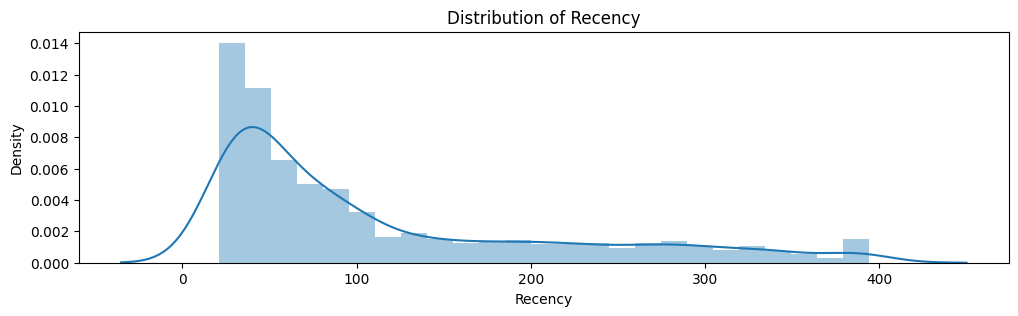

<ipython-input-31-c9917f16d570>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


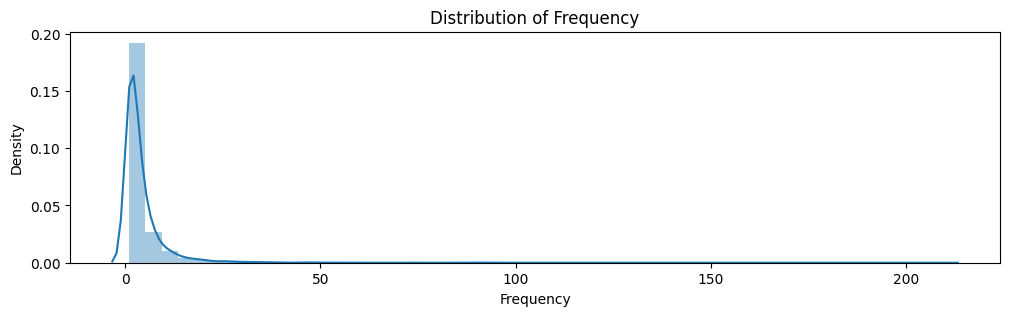

<ipython-input-31-c9917f16d570>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


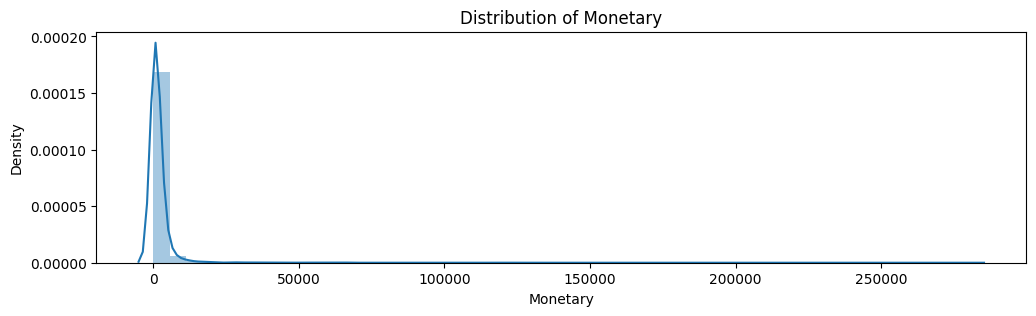

In [ ]:

colnames = ['Recency', 'Frequency', 'Monetary']
for col in colnames:
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.distplot(rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [ ]:
grp = joined.groupby('Segment').agg({'CustomerID': 'count',
                                     'Monetary': 'sum',
                                     'Recency': 'mean'}).reset_index()
grp.columns = ['Segment', 'Cust_count', 'Total_monetary', 'Avg_recency']
grp.sort_values(by='Cust_count', ascending=False, inplace=True)
grp

,Segment,Cust_count,Total_monetary,Avg_recency
3,Champions,835,5604376.680,31.816766
4,Hibernating customers,696,285673.342,169.916667
5,Lost customers,486,97405.610,296.557613
6,Loyal,428,1021224.390,57.070093
1,At Risk,422,751808.221,164.419431
9,Potential Loyalist,414,225740.110,47.053140
0,About To Sleep,283,77885.540,107.325088
7,Need Attention,280,462835.741,54.350000
8,New Customers,267,59755.620,48.891386
10,Promising,136,121031.350,45.904412


In [ ]:
grp['Count_share'] = grp['Cust_count'] / grp['Cust_count'].sum()
grp['Monetary_share'] = grp['Total_monetary'] / grp['Total_monetary'].sum()
grp

,Segment,Cust_count,Total_monetary,Avg_recency,Count_share,Monetary_share
3,Champions,835,5604376.680,31.816766,0.192485,0.628899
4,Hibernating customers,696,285673.342,169.916667,0.160443,0.032057
5,Lost customers,486,97405.610,296.557613,0.112033,0.010930
6,Loyal,428,1021224.390,57.070093,0.098663,0.114597
1,At Risk,422,751808.221,164.419431,0.097280,0.084365
9,Potential Loyalist,414,225740.110,47.053140,0.095436,0.025332
0,About To Sleep,283,77885.540,107.325088,0.065237,0.008740
7,Need Attention,280,462835.741,54.350000,0.064546,0.051937
8,New Customers,267,59755.620,48.891386,0.061549,0.006706
10,Promising,136,121031.350,45.904412,0.031351,0.013582


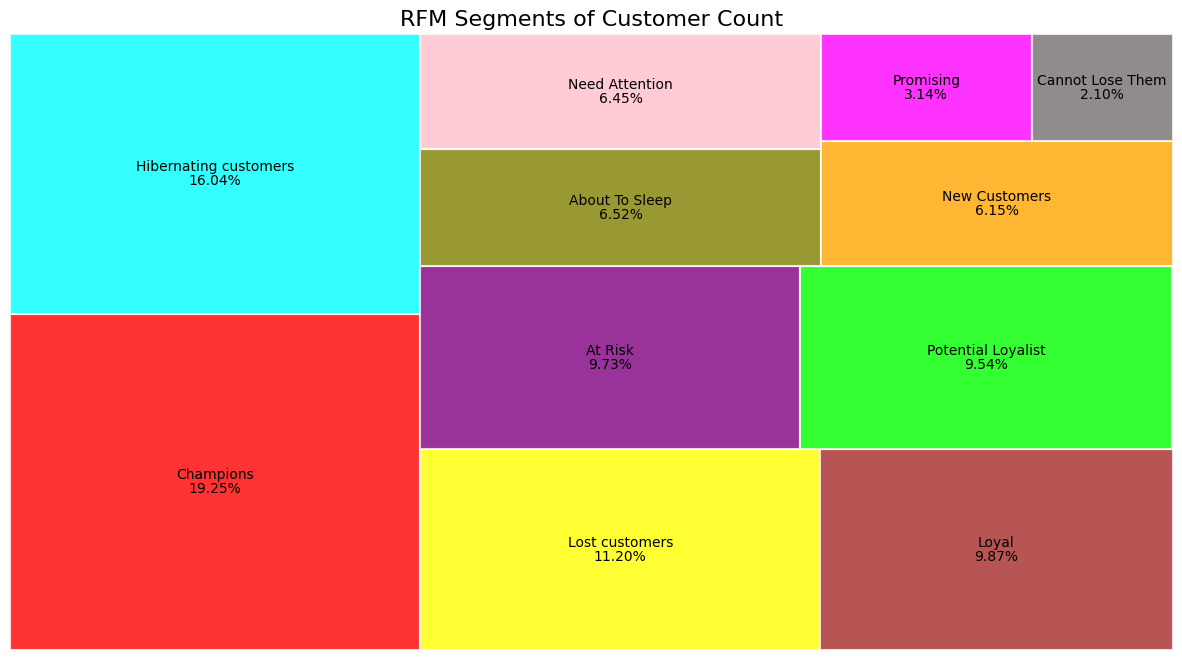

In [ ]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['Cust_count'],
              label=grp['Segment'],
              value=[f'{x*100:.2f}%' for x in grp['Count_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

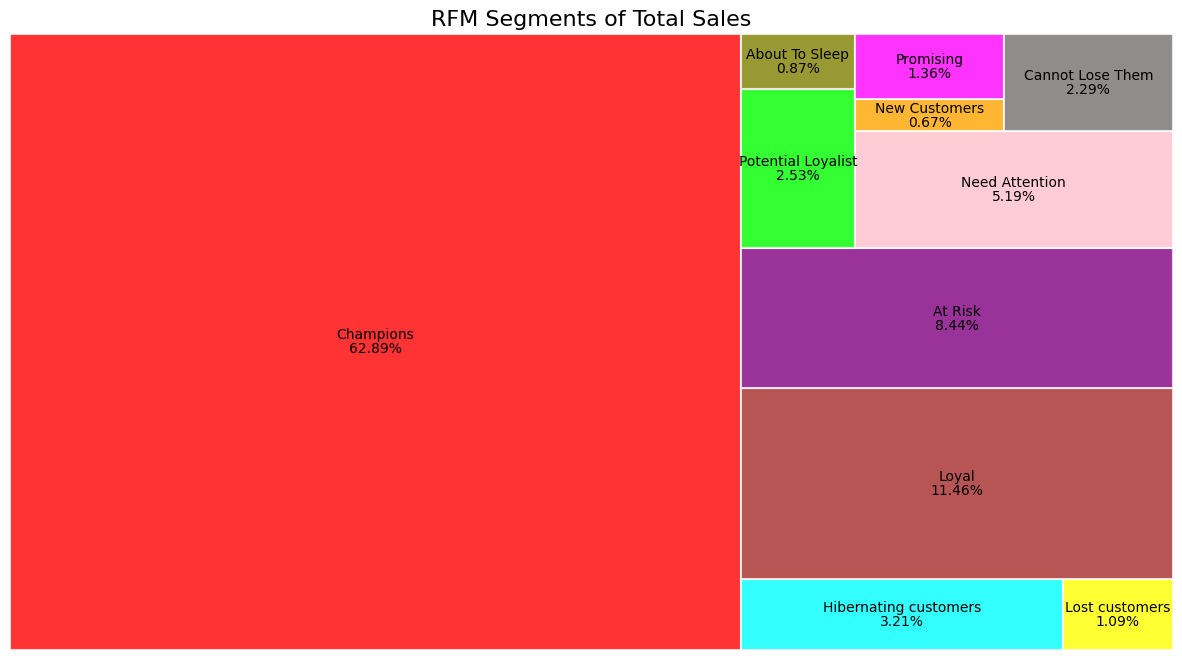

In [ ]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['Monetary_share'],
              label=grp['Segment'],
              value=[f'{x*100:.2f}%' for x in grp['Monetary_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Total Sales', fontsize=16)
plt.axis('off')
plt.show()

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_level_agg = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count','sum']
}).round(1)
# Print the aggregated dataset
rfm_level_agg

Recency Frequency Monetary                 
                         mean      mean     mean count        sum
Segment                                                          
About To Sleep          107.9      21.7    291.0   187    54420.4
At Risk                 175.9      82.1   1533.9   428   656498.2
Cannot Lose Them        240.7      48.8   3335.0    89   296817.7
Champions                32.3     291.9   7327.2   730  5348829.6
Hibernating customers   169.5      23.4    403.7   803   324132.0
Lost customers          262.0      42.2    361.8   502   181636.7
Loyal                    58.6     121.8   2456.5   417  1024356.9
Need Attention           53.4      57.6   1469.2   227   333505.3
New Customers            49.6      11.1    209.9   308    64653.8
Potential Loyalist       49.4      62.0    586.8   512   300446.0
Promising                38.2      16.7   2415.6   135   326111.4

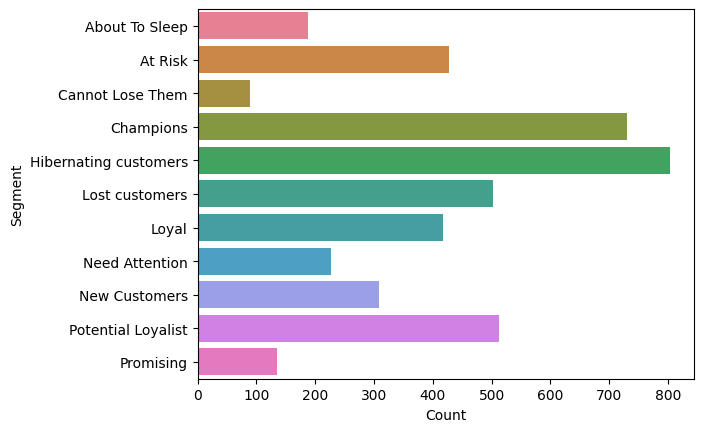

In [ ]:
sns.barplot(rfm_level_agg, x="Count", y="Segment", hue="Segment", legend=False)
plt.show()

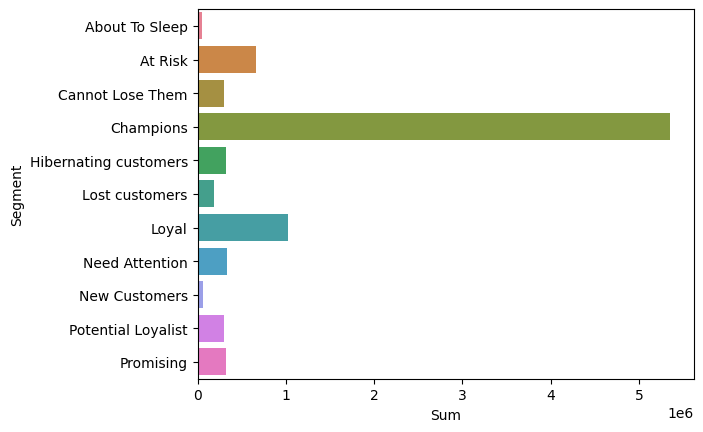

In [ ]:
sns.barplot(rfm_level_agg, x="Sum", y="Segment", hue="Segment", legend=False)
plt.show()

#Actionable insight

**Champion**: First, the Champion group is the most important group. Because this group is the second largest purchasing group after the Hibernating customers group, but generates the largest revenue for the business. What businesses need to do is offer attractive rewards to this group. Bring them new products and attractive offers.

**Potential loyalist**: The next group businesses need to focus on is the Potential loyalist group. This group is a group of recent customers of the business but spends large amounts of money and purchases more than once. Businesses need to apply membership or loyalty programs

**Promising**: The Promise group is a group of customers who have made recent purchases but have not spent too much money. Understanding this, businesses need to create programs to help customer groups understand the business's products and brand. In addition, sample products can be provided for customers to experience and try

### Definition and recommended action for each customer segment:

| Segment | Characteristics | Recommendation |
| :-: | :-: | :-: |
| Champions | Bought recently, buy often and spend the most! | Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal | Spend good money with us often. Responsive to promotions. | Upsell higher value products. Ask for reviews. Engage them. |
| Potential Loyalist | Recent customers, but spent a good amount and bought more than once. | Offer membership / loyalty program, recommend other products. |
| New customers | Bought most recently, but not often. | Provide on-boarding support, give them early success, start building relationship. |
| Promising | Recent shoppers, but haven’t spent much. | Create brand awareness, offer free trials |
| Need attention | Above average recency, frequency and monetary values. May not have bought very recently though. | Make limited time offers, Recommend based on past purchases. Reactivate them. |
| About to sleep | Below average recency, frequency and monetary values. Will lose them if not reactivated. | Share valuable resources, recommend popular products / renewals at discount, reconnect with them. |
| At risk | Spent big money and purchased often. But long time ago. Need to bring them back! | Send personalized emails to reconnect, offer renewals, provide helpful resources. |
| Cannot lose them | Made biggest purchases, and often. But haven’t returned for a long time. | Win them back via renewals or newer products, don’t lose them to competition, talk to them. |
| Hibernating customers | Last purchase was long back, low spenders and low number of orders. | Offer other relevant products and special discounts. Recreate brand value. |
| Lost customers | Lowest recency, frequency and monetary scores. | Revive interest with reach out campaign, ignore otherwise. |